In [56]:
# imports
import market_status as ms

# to copy into market_status.py
from scraper import stock_daily
import matplotlib.pyplot as plt
import indicators as ind
import pandas as pd
import numpy as np

***
# Market Status Notebook
This notebook aims to provide comprehensive status of the market, which direction its heading and which sector is stronger than the other. All required code is written in python script ```market_status.py``` to save space.

## Last 100 days of SPY, NASDAQ, and IWM
Spy = Index following S&P500, NASDAQ = Index of the NASDAQ stock exchange, IWM = Index following Russell 2000 

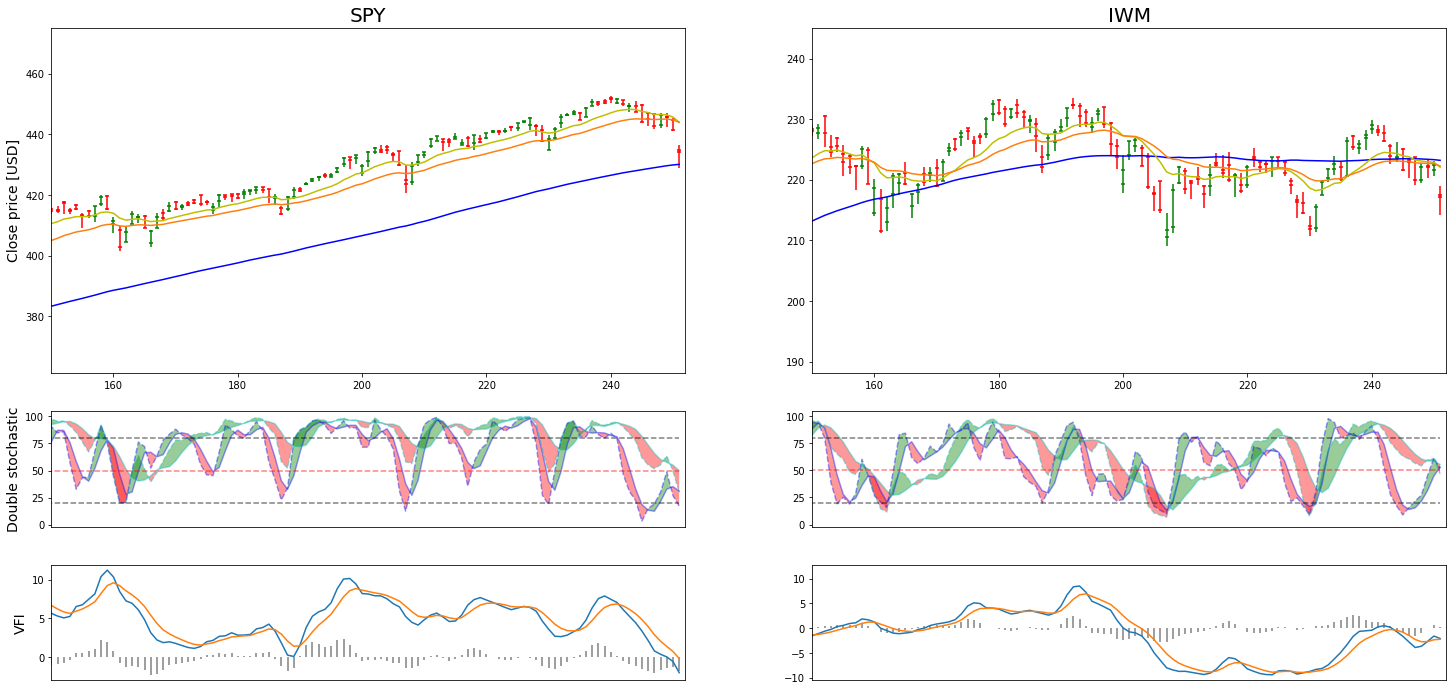

In [57]:
spy = stock_daily("SPY", save=False)
# calculating green and red days
green = spy.data.index.where(spy.data["Close"] >= spy.data["Open"])
red = spy.data.index.where(spy.data["Close"] < spy.data["Open"])
# defining the figures
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(25,12), gridspec_kw={'height_ratios': [3, 1, 1]})
rang = [150, spy.data.shape[0]]
# SPY
# plot closed prices and highlighted trades
sma = ind.sma(spy.data, 100)["SMA"]
ax[0,0].vlines(green, spy.data["Low"], spy.data["High"], color="g")
ax[0,0].scatter(green, spy.data["Open"], marker="_", color="g", s=10)
ax[0,0].scatter(green, spy.data["Close"], marker="_", color="g", s=10)
ax[0,0].vlines(red, spy.data["Low"], spy.data["High"], color="r")
ax[0,0].scatter(red, spy.data["Open"], marker="_", color="r", s=10)
ax[0,0].scatter(red, spy.data["Close"], marker="_", color="r", s=10)
ax[0,0].plot(sma, color="b")
ax[0,0].plot(ind.ema(spy.data, 13)["EMA"], "y")
ax[0,0].plot(ind.ema(spy.data, 26)["EMA"], color="tab:orange")
ax[0,0].set_title("SPY", fontsize=20)
ax[0,0].set_ylabel("Close price [USD]", fontsize=14)
ax[0,0].set_xlim(rang)
ax[0,0].set_ylim([np.min(spy.data["Low"][150:])*0.9, np.max(spy.data["High"][150:])*1.05])
# Plot double stochastic oscillator, 21 and 5
st_fast = ind.stoch(spy.data, period=21, sk=2, sd=5)
st_slow = ind.stoch(spy.data, period=5, sk=2, sd=3)
ax[1,0].plot(st_slow["k"], "b--", alpha=0.4)
ax[1,0].plot(st_slow["d"], "b", alpha=0.4)
ax[1,0].plot(st_fast["k"], "c--", alpha=0.4)
ax[1,0].plot(st_fast["d"], "c", alpha=0.4)
ax[1,0].fill_between(np.arange(spy.data.shape[0]), st_slow["k"], st_slow["d"], where=(st_slow["k"] >= st_slow["d"]), interpolate=True, facecolor="green", alpha=0.4)
ax[1,0].fill_between(np.arange(spy.data.shape[0]), st_slow["k"], st_slow["d"], where=(st_slow["k"] < st_slow["d"]), interpolate=True, facecolor="red", alpha=0.4)
ax[1,0].fill_between(np.arange(spy.data.shape[0]), st_fast["k"], st_fast["d"], where=(st_fast["k"] >= st_fast["d"]), interpolate=True, facecolor="green", alpha=0.4)
ax[1,0].fill_between(np.arange(spy.data.shape[0]), st_fast["k"], st_fast["d"], where=(st_fast["k"] < st_fast["d"]), interpolate=True, facecolor="red", alpha=0.4)
# y lines for stochastic
ax[1,0].plot(np.arange(spy.data.shape[0]), 80*np.ones(spy.data.shape[0]), "k--", alpha=0.5)
ax[1,0].plot(np.arange(spy.data.shape[0]), 50*np.ones(spy.data.shape[0]), "r--", alpha=0.5)
ax[1,0].plot(np.arange(spy.data.shape[0]), 20*np.ones(spy.data.shape[0]), "k--", alpha=0.5)
ax[1,0].set_xlim(rang)
ax[1,0].set_ylabel("Double stochastic", fontsize=14)
ax[1,0].set_xticks([])
ax[1,0].set_xticklabels([])
# plot VFI
vfi = ind.vfi(spy.data, period=30, coef=0.2, vcoef=1.5)
ax[2,0].plot(vfi["vfi"])
ax[2,0].plot(vfi["vfi_smooth"])
ax[2,0].vlines(spy.data.index, 0, vfi["histogram"], "k", alpha=0.5)
ax[2,0].set_xlim(rang)
ax[2,0].set_ylabel("VFI", fontsize=14)
ax[2,0].set_xticks([])
ax[2,0].set_xticklabels([])


# IWM
iwm = stock_daily("IWM", save=False)
# calculating green and red days
green = iwm.data.index.where(iwm.data["Close"] >= iwm.data["Open"])
red = iwm.data.index.where(iwm.data["Close"] < iwm.data["Open"])
rang = [150, iwm.data.shape[0]]
# plot closed prices and highlighted trades
sma = ind.sma(iwm.data, 100)["SMA"]
ax[0,1].vlines(green, iwm.data["Low"], iwm.data["High"], color="g")
ax[0,1].scatter(green, iwm.data["Open"], marker="_", color="g", s=10)
ax[0,1].scatter(green, iwm.data["Close"], marker="_", color="g", s=10)
ax[0,1].vlines(red, iwm.data["Low"], iwm.data["High"], color="r")
ax[0,1].scatter(red, iwm.data["Open"], marker="_", color="r", s=10)
ax[0,1].scatter(red, iwm.data["Close"], marker="_", color="r", s=10)
ax[0,1].plot(sma, "b")
ax[0,1].plot(ind.ema(iwm.data, 13)["EMA"], "y")
ax[0,1].plot(ind.ema(iwm.data, 26)["EMA"], color="tab:orange")
ax[0,1].set_title("IWM", fontsize=20)
ax[0,1].set_xlim(rang)
ax[0,1].set_ylim([np.min(iwm.data["Low"][150:])*0.9, np.max(iwm.data["High"][150:])*1.05])
# Plot double stochastic oscillator, 21 and 5
st_fast = ind.stoch(iwm.data, period=21, sk=2, sd=5)
st_slow = ind.stoch(iwm.data, period=5, sk=2, sd=3)
ax[1,1].plot(st_slow["k"], "b--", alpha=0.4)
ax[1,1].plot(st_slow["d"], "b", alpha=0.4)
ax[1,1].plot(st_fast["k"], "c--", alpha=0.4)
ax[1,1].plot(st_fast["d"], "c", alpha=0.4)
ax[1,1].fill_between(np.arange(iwm.data.shape[0]), st_slow["k"], st_slow["d"], where=(st_slow["k"] >= st_slow["d"]), interpolate=True, facecolor="green", alpha=0.4)
ax[1,1].fill_between(np.arange(iwm.data.shape[0]), st_slow["k"], st_slow["d"], where=(st_slow["k"] < st_slow["d"]), interpolate=True, facecolor="red", alpha=0.4)
ax[1,1].fill_between(np.arange(iwm.data.shape[0]), st_fast["k"], st_fast["d"], where=(st_fast["k"] >= st_fast["d"]), interpolate=True, facecolor="green", alpha=0.4)
ax[1,1].fill_between(np.arange(iwm.data.shape[0]), st_fast["k"], st_fast["d"], where=(st_fast["k"] < st_fast["d"]), interpolate=True, facecolor="red", alpha=0.4)
# y lines for stochastic
ax[1,1].plot(np.arange(iwm.data.shape[0]), 80*np.ones(iwm.data.shape[0]), "k--", alpha=0.5)
ax[1,1].plot(np.arange(iwm.data.shape[0]), 50*np.ones(iwm.data.shape[0]), "r--", alpha=0.5)
ax[1,1].plot(np.arange(iwm.data.shape[0]), 20*np.ones(iwm.data.shape[0]), "k--", alpha=0.5)
ax[1,1].set_xlim(rang)
ax[1,1].set_xticks([])
ax[1,1].set_xticklabels([])
# plot VFI
vfi = ind.vfi(iwm.data, period=30, coef=0.2, vcoef=1.5)
ax[2,1].plot(vfi["vfi"])
ax[2,1].plot(vfi["vfi_smooth"])
ax[2,1].vlines(iwm.data.index, 0, vfi["histogram"], "k", alpha=0.5)
ax[2,1].set_xlim(rang)
ax[2,1].set_xticks([])
ax[2,1].set_xticklabels([])

plt.show()
